In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/HG01890_rbDF2_Kmode.csv").set_index("Alu")
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_29825231-29825519,0,2216,['45510 373 24.0 3.7 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22
C_AluY_29827646-29827937,0,2411,['45513 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22
C_AluY_29830064-29830355,0,2411,['45516 405 24.4 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22
C_AluY_29832473-29832761,0,2399,['45519 363 27.6 2.7 4.0 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22
C_AluY_29834883-29835171,0,2403,['45522 410 24.2 4.6 3.0 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22
...,...,...,...,...,...
+_AluSx_46159487-46159815,20,507,['60051 2110 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard
+_AluJb_46160943-46161093,20,1012,['60053 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard
+_AluSp_46161094-46161391,20,298,['60055 2100 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard


In [3]:
rb_df2.iloc[0]['Group']

"['45510 373 24.0 3.7 3.7 chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890 29823871 29825228 16582676 False (ATATAAT)n Simple_repeat 1 1358 0 36512 False', '45511 1333 20.1 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890 29825231 29825519 16582385 True AluY SINE/Alu 15 286 13 36513 True', '45512 4104 9.0 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890 29825519 29826086 16581818 True HSATI Satellite 0 568 1 36514 False']"

In [4]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split(".utig4-384.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [5]:
AluCoordinateDict

{'HG01890:29823871-29826086': 'C_AluY_29825231-29825519',
 'HG01890:29826094-29828504': 'C_AluY_29827646-29827937',
 'HG01890:29828512-29830922': 'C_AluY_29830064-29830355',
 'HG01890:29830930-29833328': 'C_AluY_29832473-29832761',
 'HG01890:29833336-29835738': 'C_AluY_29834883-29835171',
 'HG01890:29835746-29838156': 'C_AluY_29837299-29837589',
 'HG01890:29838164-29840571': 'C_AluY_29839713-29840000',
 'HG01890:29840579-29842989': 'C_AluY_29842134-29842422',
 'HG01890:29845844-29848249': '+_AluY_29846411-29846702',
 'HG01890:29848257-29850656': '+_AluY_29848824-29849115',
 'HG01890:29850675-29853082': '+_AluY_29851242-29851534',
 'HG01890:29853090-29855479': '+_AluY_29853656-29853948',
 'HG01890:29855487-29857041': '+_AluY_29856054-29856345',
 'HG01890:30203322-30205736': 'C_AluY_30204878-30205169',
 'HG01890:30205744-30208151': 'C_AluY_30207293-30207584',
 'HG01890:30208159-30210571': 'C_AluY_30209713-30210004',
 'HG01890:30210579-30212981': 'C_AluY_30212123-30212414',
 'HG01890:3021

In [6]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['KMode_cluster'] == 'GraveYard':
        AluDict[alu]='black'
    else:
        AluDict[alu]= rb_df2.loc[alu]['KMode_cluster']

AluDict

{'C_AluY_29825231-29825519': '#228B22',
 'C_AluY_29827646-29827937': '#228B22',
 'C_AluY_29830064-29830355': '#228B22',
 'C_AluY_29832473-29832761': '#228B22',
 'C_AluY_29834883-29835171': '#228B22',
 'C_AluY_29837299-29837589': '#228B22',
 'C_AluY_29839713-29840000': '#228B22',
 'C_AluY_29842134-29842422': '#228B22',
 '+_AluY_29846411-29846702': '#228B22',
 '+_AluY_29848824-29849115': '#228B22',
 '+_AluY_29851242-29851534': '#228B22',
 '+_AluY_29853656-29853948': '#228B22',
 '+_AluY_29856054-29856345': '#228B22',
 'C_AluY_30204878-30205169': '#228B22',
 'C_AluY_30207293-30207584': '#4169e1',
 'C_AluY_30209713-30210004': '#228B22',
 'C_AluY_30212123-30212414': '#4169e1',
 'C_AluY_30214543-30214834': '#228B22',
 'C_AluY_30216958-30217249': '#4169e1',
 'C_AluY_30219373-30219664': '#4169e1',
 'C_AluY_30221793-30222084': '#228B22',
 'C_AluY_30224213-30224504': '#228B22',
 'C_AluY_30226628-30226919': '#4169e1',
 'C_AluY_30229048-30229339': '#4169e1',
 'C_AluY_30231468-30231759': '#228B22',


In [7]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [8]:
allSamplesDF = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/AllSamples_nonDYZ_AluBlocks.csv").set_index("Alu")
ASDF = allSamplesDF[allSamplesDF['SampleName']=='HG01890'].copy()
ASDF

,RepeatBlock,Lengths,Group,Block_Size,SampleName,Divergence
Alu,,,,,,
C_AluY_35329214-35329540,7,765,['49259 2303 4.0 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,4.0
C_AluY_35348865-35349191,7,765,['49286 2303 4.0 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,4.0
C_AluY_35351615-35351941,7,766,['49291 2303 4.0 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,4.0
C_AluY_35356789-35357116,7,767,['49301 2378 3.0 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,3.0
C_AluY_36234421-36234754,8,763,['50098 2273 3.6 0.1 0.1 chrY.01-24.01.PAR1-PA...,<999,HG01890,3.6
C_AluY_36237166-36237496,8,760,['50103 2285 3.6 0.1 0.1 chrY.01-24.01.PAR1-PA...,<999,HG01890,3.6
C_AluY_36239908-36240240,8,762,['50108 2285 3.6 0.1 0.1 chrY.01-24.01.PAR1-PA...,<999,HG01890,3.6
C_AluY_39657862-39658185,11,763,['53680 2376 2.4 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,2.4
C_AluY_39660609-39660932,11,763,['53687 2677 2.1 0.0 0.0 chrY.01-24.01.PAR1-PA...,<999,HG01890,2.1


In [9]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HG01890_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [10]:
AluDict2

{'C_AluY_29825231-29825519': 2.3,
 'C_AluY_29827646-29827937': 2.6,
 'C_AluY_29830064-29830355': 2.6,
 'C_AluY_29832473-29832761': 2.2,
 'C_AluY_29834883-29835171': 2.6,
 'C_AluY_29837299-29837589': 1.8,
 'C_AluY_29839713-29840000': 2.2,
 'C_AluY_29842134-29842422': 3.0,
 '+_AluY_29846411-29846702': 2.2,
 '+_AluY_29848824-29849115': 2.8,
 '+_AluY_29851242-29851534': 2.1,
 '+_AluY_29853656-29853948': 2.9,
 '+_AluY_29856054-29856345': 4.1,
 'C_AluY_30204878-30205169': 1.5,
 'C_AluY_30207293-30207584': 0.8,
 'C_AluY_30209713-30210004': 1.6,
 'C_AluY_30212123-30212414': 0.8,
 'C_AluY_30214543-30214834': 1.6,
 'C_AluY_30216958-30217249': 1.5,
 'C_AluY_30219373-30219664': 1.6,
 'C_AluY_30221793-30222084': 0.9,
 'C_AluY_30224213-30224504': 1.8,
 'C_AluY_30226628-30226919': 1.6,
 'C_AluY_30229048-30229339': 0.8,
 'C_AluY_30231468-30231759': 1.9,
 'C_AluY_30233883-30234174': 1.6,
 'C_AluY_30236303-30236594': 0.9,
 'C_AluY_30238723-30239011': 2.0,
 'C_AluY_30241140-30241431': 0.8,
 'C_AluY_30243

In [11]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in ASDF.index}
print(len(AluDict2))
print(len(AluDict3))

2684
2662


In [12]:
AluDict3

{'C_AluY_29825231-29825519': 2.3,
 'C_AluY_29827646-29827937': 2.6,
 'C_AluY_29830064-29830355': 2.6,
 'C_AluY_29832473-29832761': 2.2,
 'C_AluY_29834883-29835171': 2.6,
 'C_AluY_29837299-29837589': 1.8,
 'C_AluY_29839713-29840000': 2.2,
 'C_AluY_29842134-29842422': 3.0,
 '+_AluY_29846411-29846702': 2.2,
 '+_AluY_29848824-29849115': 2.8,
 '+_AluY_29851242-29851534': 2.1,
 '+_AluY_29853656-29853948': 2.9,
 '+_AluY_29856054-29856345': 4.1,
 'C_AluY_30204878-30205169': 1.5,
 'C_AluY_30207293-30207584': 0.8,
 'C_AluY_30209713-30210004': 1.6,
 'C_AluY_30212123-30212414': 0.8,
 'C_AluY_30214543-30214834': 1.6,
 'C_AluY_30216958-30217249': 1.5,
 'C_AluY_30219373-30219664': 1.6,
 'C_AluY_30221793-30222084': 0.9,
 'C_AluY_30224213-30224504': 1.8,
 'C_AluY_30226628-30226919': 1.6,
 'C_AluY_30229048-30229339': 0.8,
 'C_AluY_30231468-30231759': 1.9,
 'C_AluY_30233883-30234174': 1.6,
 'C_AluY_30236303-30236594': 0.9,
 'C_AluY_30238723-30239011': 2.0,
 'C_AluY_30241140-30241431': 0.8,
 'C_AluY_30243

/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

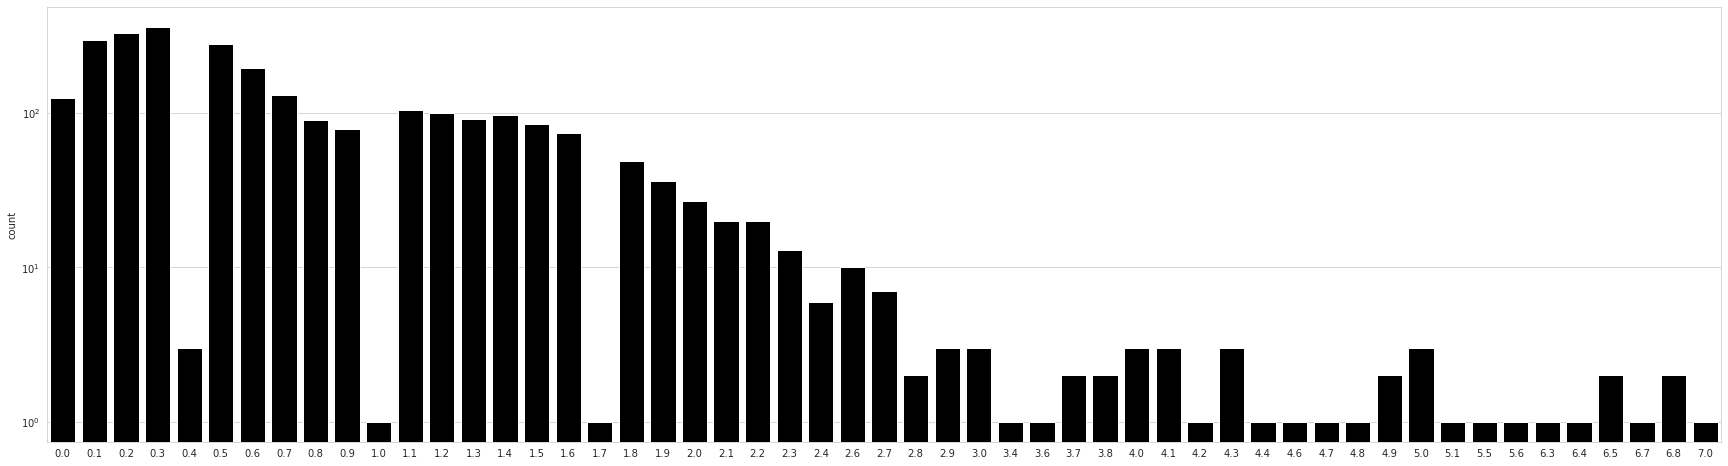

In [13]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [14]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,Divergence
Alu,,,,,,
C_AluY_29825231-29825519,0,2216,['45510 373 24.0 3.7 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22,2.3
C_AluY_29827646-29827937,0,2411,['45513 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22,2.6
C_AluY_29830064-29830355,0,2411,['45516 405 24.4 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22,2.6
C_AluY_29832473-29832761,0,2399,['45519 363 27.6 2.7 4.0 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22,2.2
C_AluY_29834883-29835171,0,2403,['45522 410 24.2 4.6 3.0 chrY.01-24.01.PAR1-PA...,2000-2999,#228B22,2.6
...,...,...,...,...,...,...
+_AluSx_46159487-46159815,20,507,['60051 2110 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard,100.0
+_AluJb_46160943-46161093,20,1012,['60053 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard,100.0
+_AluSp_46161094-46161391,20,298,['60055 2100 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard,100.0


In [15]:
rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/rb_df_Divergence.csv")

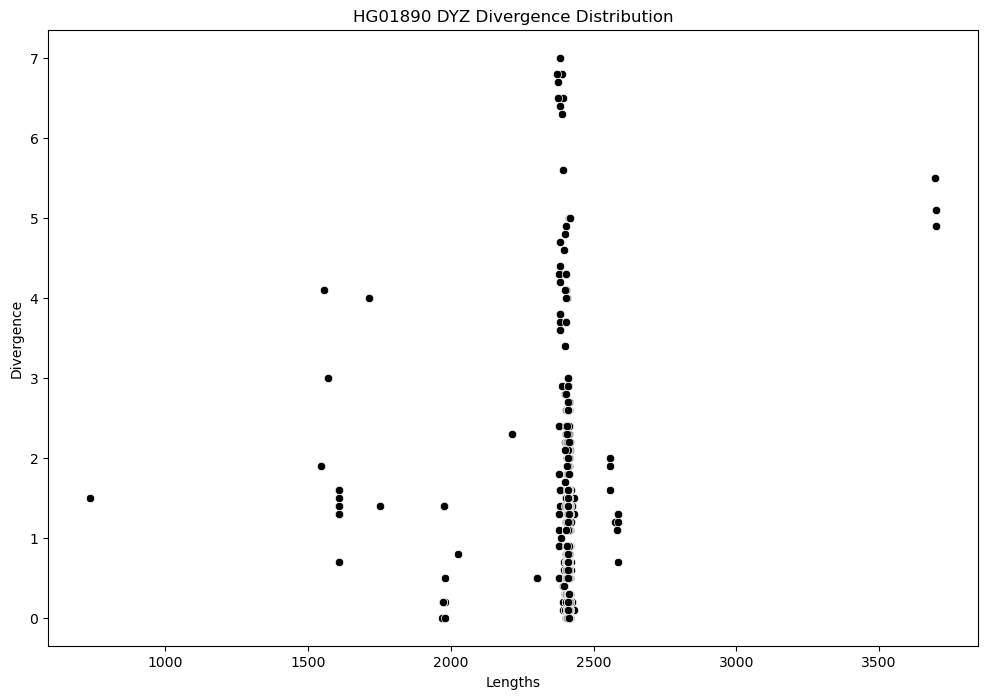

In [43]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HG01890 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[(rb_df2['Divergence']!=100.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Lengths'], y=rb_df2[(rb_df2['Divergence']<10.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [53]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

[<matplotlib.collections.PathCollection object at 0x7f5e8621e2b0>, <matplotlib.collections.PathCollection object at 0x7f5e861734c0>, <matplotlib.collections.PathCollection object at 0x7f5e8617f190>, <matplotlib.collections.PathCollection object at 0x7f5e8617f460>]
['2000-2999', '1000-1999', '3000-3999', '<999']


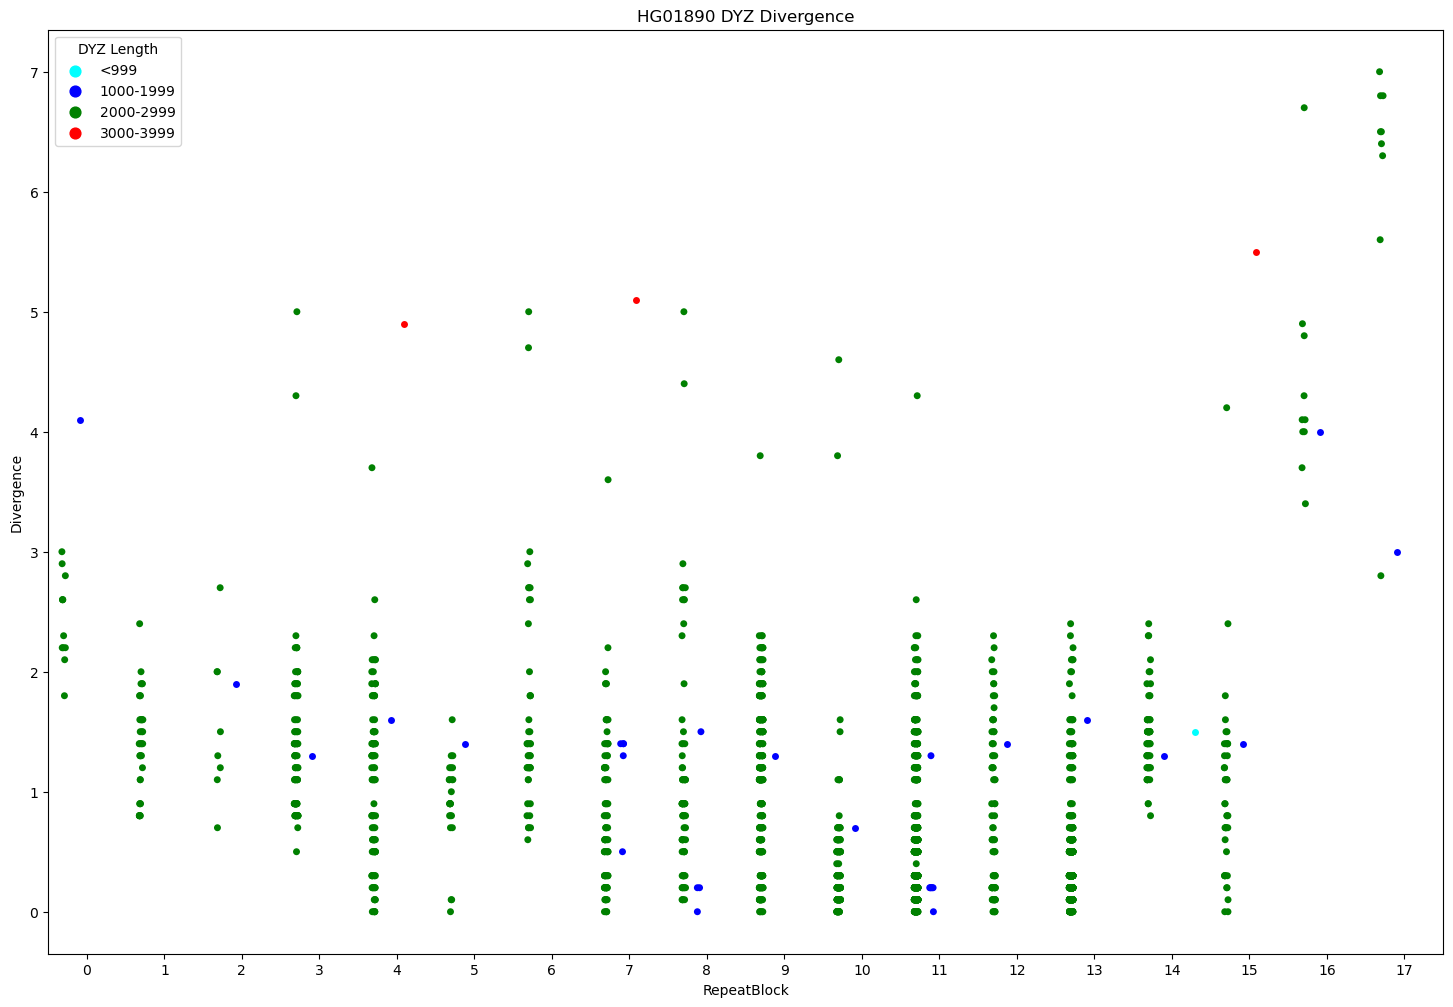

In [54]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG01890 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [3,1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

In [18]:
import collections
collections.Counter(AluDict.values())

Counter({'#861657': 94,
         '#2A7F62': 664,
         '#E1CE7A': 19,
         '#538083': 1771,
         'lightgrey': 124,
         '#FF1053': 2,
         '#F06543': 10,
         'black': 63})

## Drawing Blocks

In [19]:
import turtle

In [20]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01890 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(rb_df2['RepeatBlock']))):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 21/21 [05:25<00:00, 15.52s/it]


In [21]:
from PIL import Image

In [22]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [23]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_RM_DYZ_Divergence")

In [24]:
turtle.bye()